In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

Regression models predict a continuous variable, such as the sales made on a day or predict temperature of a city.

Their reliance on a polynomial (like a straight line) to fit a dataset possesses a real challenge when it comes towards building a classification capability.

Let’s imagine that you fit a line with the training points you have. Imagine you want to add another data point, but to fit it, you need to change your existing model (maybe the threshold itself, as well). This will happen with each data point that we add to the model; hence, linear regression isn’t good for classification models.

In [52]:
np.exp(0.0039419 * 1000)

51.516389512381224

In [49]:
(1+0.039419)**1000

6.175202737883604e+16

In [76]:
#### 
# Pandas df with companies properties
####

mean = np.array([0.001, 0.00132, 0.00127, 0.0019, 0.0011])

# cov = np.array([[0.1, 0.06 , 0.03, 0.08, 0.09],
#        [0.06, 0.002 , 0.01, 0.001, 0.01],
#        [0.03, 0.01 , 0.003, 0.01, 0.02],
#        [0.08, 0.001, 0.01, 0.04, 0.01],
#        [0.09 , 0.01  , 0.02, 0.001, 0.005]])
cov = np.outer(mean, mean)

returns = np.random.multivariate_normal(mean, cov, 1000)

df = pd.DataFrame(returns, columns = ['aapl', 'msft', 'goog', 'amzn', 'sap'])

df1 = df.add(1).cumprod().add(-1)
df1.tail()

,aapl,msft,goog,amzn,sap
995,1.736870,2.775684,2.590598,5.761686,2.026445
996,1.740237,2.781814,2.596207,5.777489,2.030540
997,1.747155,2.794417,2.607738,5.809999,2.038956
998,1.749361,2.798439,2.611417,5.820390,2.041640
999,1.752224,2.803661,2.616193,5.833884,2.045125


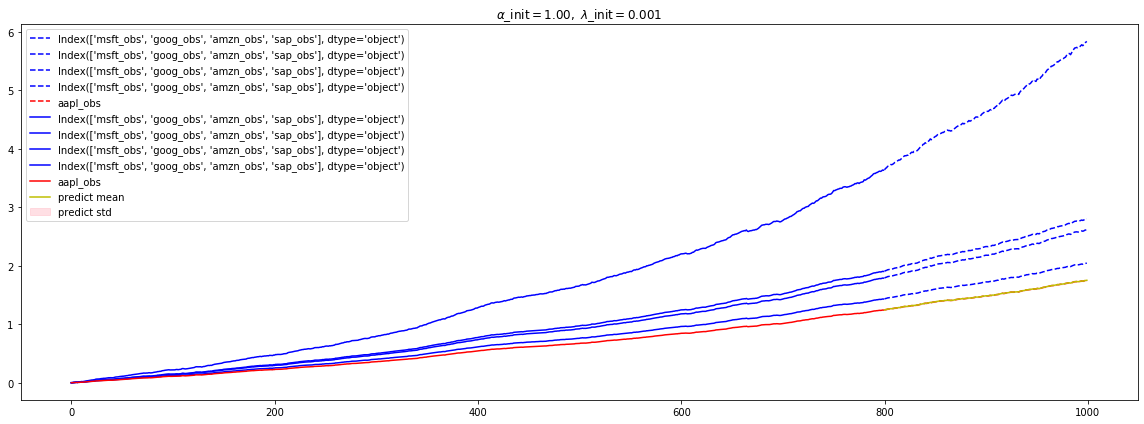

In [133]:
n_order = 3
X, y = df1.drop('aapl', axis=1), df1['aapl']

X_train, X_test = X.iloc[:800], X.iloc[800:]
y_train, y_test = y.iloc[:800], y.iloc[800:] # train_test_split(X, y, test_size=0.2)

# #############################################################################
# Plot the true and predicted curves with log marginal likelihood (L)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
plt.figure(figsize=(16, 6))

init = [1 / np.var(y_train), 1.]  # Default values
init = [1., 1e-3]
reg.set_params(alpha_init=init[0], lambda_init=init[1])
reg.fit(X_train, y_train)
ymean, ystd = reg.predict(X_test, return_std=True)

plt.plot(X_test, color="blue", linestyle='--', label=X_test.columns + '_obs')
plt.plot(y_test, color="red",  linestyle='--', label=y.name + '_obs')
plt.plot(X_train, color="blue", label=X.columns + '_obs')
plt.plot(y_train, color="red", label=y.name + '_obs')
plt.plot(X_test.index, ymean, color="y", label="predict mean")
plt.fill_between(X_test.index, ymean-ystd, ymean+ystd, color="pink", alpha=0.5, label="predict std")
plt.legend()
title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
plt.title(title, fontsize=12)
# text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(reg.alpha_, reg.lambda_, reg.scores_[-1])
# plt.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()

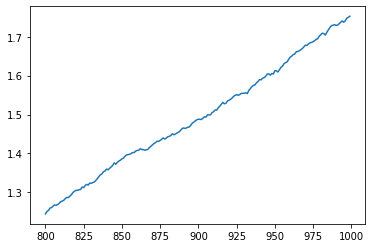

In [124]:
plt.plot(X_test.index, ymean)

In [101]:
X_test

,msft,goog,amzn,sap
800,1.906126,1.791170,3.639990,1.433200
801,1.916895,1.801121,3.664738,1.440714
802,1.921430,1.805311,3.675178,1.443876
803,1.931752,1.814847,3.698953,1.451071
804,1.934099,1.817016,3.704368,1.452707
...,...,...,...,...
995,2.775684,2.590598,5.761686,2.026445
996,2.781814,2.596207,5.777489,2.030540
997,2.794417,2.607738,5.809999,2.038956
998,2.798439,2.611417,5.820390,2.041640


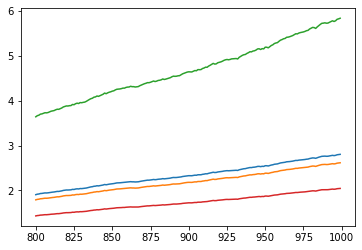

In [97]:
plt.plot(X_test)